# Análisis de Sentimientos de Comentarios de la Categoria Jueguetes, Niños y Bebés de Linio Colombia
**Autores:** Pedro Javier Bohorquez - Angela Sofia Remolina - Paula Andrea Caicedo  <br>
**Fuente:** *https://www.linio.com.co/c/juguetes-ninos-y-bebes*<br>

In [80]:
## Importando los paquetes para el análisis de los datos
#General Packages
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from nltk.util import ngrams
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
nltk.download('wordnet')
from nltk.corpus import wordnet
import re

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
data = pd.read_csv('Productos.csv',delimiter=']',quotechar='[',encoding='utf-8')

In [82]:
data.head(3)

,;[['Producto',", ['Precio'",", ['Autor'",", ['Comentario'",", ['Calificacion'",", ['Fecha'",Unnamed: 6,Unnamed: 7
0,;[['Silla comedor bebe 3en1 Happy Baby CP7000 ...,", ['$109.900'",", ['karol stephanie rondon torres'",", ['NaN'",", ['4'",", ['10/09/20'",NaN,NaN
1,;[['Silla comedor bebe 3en1 Happy Baby CP7000 ...,", ['$109.900'",", ['Andres Grondona'",", ['NaN'",", ['5'",", ['10/09/20'",NaN,NaN
2,;[['Silla comedor bebe 3en1 Happy Baby CP7000 ...,", ['$109.900'",", ['laura nataly quiroga rodriguez laura natal...",", ['NaN'",", ['5'",", ['09/09/20'",NaN,NaN


### Proceso de preparación de los datos: *Data Wrangling*

**1. Dataset Structuring**

Debido a que los datos proporcionados tienen algunas columnas agregadas, el primer paso para el proceso de preparación del conjunto de datos es separar los datos relevantes en varias columnas.Por la estructura del CSV,al finalizar se tenian dos caracteres "]]" y el Data Frame lo tomaba como dos columnas vacias, por lo cual se eliminaron de la siguiente manera:

In [83]:
data = data.drop(['Unnamed: 7'], axis=1)

In [84]:
data = data.drop(['Unnamed: 6'], axis=1)

In [85]:
data.head(3)

,;[['Producto',", ['Precio'",", ['Autor'",", ['Comentario'",", ['Calificacion'",", ['Fecha'"
0,;[['Silla comedor bebe 3en1 Happy Baby CP7000 ...,", ['$109.900'",", ['karol stephanie rondon torres'",", ['NaN'",", ['4'",", ['10/09/20'"
1,;[['Silla comedor bebe 3en1 Happy Baby CP7000 ...,", ['$109.900'",", ['Andres Grondona'",", ['NaN'",", ['5'",", ['10/09/20'"
2,;[['Silla comedor bebe 3en1 Happy Baby CP7000 ...,", ['$109.900'",", ['laura nataly quiroga rodriguez laura natal...",", ['NaN'",", ['5'",", ['09/09/20'"


Como los nombres de las columnas, estaban escritos en la manera en como se extrajo el CSV, las columnas se reescribieron sin caracteres especiales:

In [86]:
data.columns=['Nombre Producto','Precio','Autor','Comentario','Calificacion','Fecha']

In [87]:
data.head(3)

,Nombre Producto,Precio,Autor,Comentario,Calificacion,Fecha
0,;[['Silla comedor bebe 3en1 Happy Baby CP7000 ...,", ['$109.900'",", ['karol stephanie rondon torres'",", ['NaN'",", ['4'",", ['10/09/20'"
1,;[['Silla comedor bebe 3en1 Happy Baby CP7000 ...,", ['$109.900'",", ['Andres Grondona'",", ['NaN'",", ['5'",", ['10/09/20'"
2,;[['Silla comedor bebe 3en1 Happy Baby CP7000 ...,", ['$109.900'",", ['laura nataly quiroga rodriguez laura natal...",", ['NaN'",", ['5'",", ['09/09/20'"


Como todos los datos, se separaron de acuerdo al caracter "]", la mayoria de los elementos cuentas con caracteres especiales como lo son (;- [] - ''). Esos datos de acuerdo a las expresiones regulares, son remplazados por espacios:

In [88]:
data = data.replace('\[','',regex=True).astype(str)
data = data.replace('\;','',regex=True).astype(str)
data = data.replace('\,','',regex=True).astype(str)
data = data.replace('\'','',regex=True).astype(str)

In [89]:
data.head(5)

,Nombre Producto,Precio,Autor,Comentario,Calificacion,Fecha
0,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,karol stephanie rondon torres,NaN,4,10/09/20
1,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Andres Grondona,NaN,5,10/09/20
2,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,laura nataly quiroga rodriguez laura nataly q...,NaN,5,09/09/20
3,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Cele Aguas,super práctica y de buena calidad.,5,02/09/20
4,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Siomara Rua,NaN,5,29/08/20


In [90]:
data['Nombre Producto'].value_counts()

Avent Set Teteros Naturals Anti Gases Bebe New Born-Unisex                                                              217
COJIN PARA EMBARAZO Y LACTANCIA CUERPO COMPLETO AZUL                                                                     81
Carpa Castillo Princesa Del Bosque Niña Casa Jardín Playa                                                                76
Moto Carro Electrica Montable Recargable Niños Niñas 4años - Rosado                                                      76
Medias Y Manillas Juguetes Estimulación Bebes Niño Y Niña + Sozzy                                                        74
Cocina juguete Niñas con Luces Y Sonido                                                                                  61
SUDADERA NIÑO HUBBLE CAPITAN                                                                                             52
Deslizadero o Rodadero Niños Infantil + Bola Didáctica                                                                   50
Moto Car

**2. Dataset Cleaning**

Para realizar el data Cleaning, se empezo buscando valores nulos, pero los comentarios cuando se realizo el web-scrapping, los valores nulos de los comentarios se almacenaron como objetos de tipo ```object```, representados por el termino ```'NaN'```, por ende si se buscan esos valores nulos, estos no aparecen.

In [91]:
data.isnull().sum()

Nombre Producto    0
Precio             0
Autor              0
Comentario         0
Calificacion       0
Fecha              0
dtype: int64

In [92]:
data.dtypes

Nombre Producto    object
Precio             object
Autor              object
Comentario         object
Calificacion       object
Fecha              object
dtype: object

Se creo una copia del Data Frame del CSV, y a ese documneto se le eliminaron los comentarios que contenian el valor ```' NaN'```. El tratamiento aplicado a los datos nulos fue el N°4, solo a los que contienen comentarios vacios, porque el analisis que se realiza en el proyecto, esta dirigido al procesamiento del texto.

In [93]:
data_copy = data.copy()
data_copy = data_copy[data_copy.Comentario != ' NaN']

Despues de realizar el proceso del data Cleaning y Data Structuring, la cantidad de datos que quedaron para analizar fueron los siguientes:

In [94]:
data.shape

(1632, 6)

In [95]:
data_copy.shape

(584, 6)

In [96]:
data['Nombre Producto'].value_counts().sum()-data_copy['Nombre Producto'].value_counts().sum()

1048

**3. Dataset Enriching**

Para el proceso de enriquecimiento del conjunto de datos principal, vamos a convertir la columna date a un formato de tiempo ```datetime```, pues en este momento se encuentra como un tipo de dato ```object```. Asi mismo, calificacion se convierte en dato de tipo ```int```,con el fin de manera datos especificos dentro de este tipo de variables en sus respectivos formatos.

In [97]:
data_copy['Fecha'] = pd.to_datetime(data_copy['Fecha'],dayfirst=True)

In [98]:
data_copy['Calificacion'] = data_copy['Calificacion'].astype(str).astype(int)

In [99]:
data_copy.dtypes

Nombre Producto            object
Precio                     object
Autor                      object
Comentario                 object
Calificacion                int32
Fecha              datetime64[ns]
dtype: object

Como al los datos se extraejeron datos nulos, los indices tambien fueron afectados, entonces se realizo un ```re_index()``` a todo el conjunto de datos. Asi mismo, para proceder un **analisis exploratorio de datos**, se creo columna de tipo ```mes``` para analizar la cantidad de comentarios generados por meses. 

In [100]:
data_copy = data_copy.reset_index(drop=True)
data_copy

,Nombre Producto,Precio,Autor,Comentario,Calificacion,Fecha
0,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Cele Aguas,super práctica y de buena calidad.,5,2020-09-02
1,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Fredy Javier Gonzalez Parra,Bue producto,5,2020-08-27
2,Silla comedor bebe 3en1 Happy Baby Cp7000 Rosa,$109.900,Sandra Arango,Excelente,5,2020-09-09
3,Inflador de Globos Eléctrico Automático Doble ...,$68.500,Carlos andres Bedoya osorio Carlos andres Bed...,exelente servicio,5,2020-09-10
4,Inflador de Globos Eléctrico Automático Doble ...,$68.500,Danilo Guerrero,Excelente producto,5,2020-09-03
...,...,...,...,...,...,...
579,Bulto 500 Pelotas Para Piscina Paquete Colores...,$92.000,Karen Banderas,No todas las pelotas no son de la misma calid...,2,2020-06-30
580,Bulto 500 Pelotas Para Piscina Paquete Colores...,$92.000,Charles Alberto Castrillo Jimenez,muy buen producto puntuales en la entrega y m...,5,2020-06-25
581,Bulto 500 Pelotas Para Piscina Paquete Colores...,$92.000,Karina Mogollon Karina Mogollon,Buena calidad,5,2020-05-23
582,Bulto 500 Pelotas Para Piscina Paquete Colores...,$92.000,Yelitza Blanco Julio,No eran de colores vivos como dicen en la des...,4,2020-05-22


In [101]:
data_copy['mes'] = data_copy.apply(lambda row: '0'*(2-len(str(row['Fecha'].month))) + str(row['Fecha'].month) + '-' + row['Fecha'].month_name(), axis=1) 
data_copy.head(5)

,Nombre Producto,Precio,Autor,Comentario,Calificacion,Fecha,mes
0,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Cele Aguas,super práctica y de buena calidad.,5,2020-09-02,09-September
1,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Fredy Javier Gonzalez Parra,Bue producto,5,2020-08-27,08-August
2,Silla comedor bebe 3en1 Happy Baby Cp7000 Rosa,$109.900,Sandra Arango,Excelente,5,2020-09-09,09-September
3,Inflador de Globos Eléctrico Automático Doble ...,$68.500,Carlos andres Bedoya osorio Carlos andres Bed...,exelente servicio,5,2020-09-10,09-September
4,Inflador de Globos Eléctrico Automático Doble ...,$68.500,Danilo Guerrero,Excelente producto,5,2020-09-03,09-September


In [102]:
len(data_copy['Nombre Producto'].unique())

54

In [103]:
data_copy['Nombre Producto'].value_counts()

Avent Set Teteros Naturals Anti Gases Bebe New Born-Unisex                                                              57
Medias Y Manillas Juguetes Estimulación Bebes Niño Y Niña + Sozzy                                                       43
COJIN PARA EMBARAZO Y LACTANCIA CUERPO COMPLETO AZUL                                                                    33
Carpa Castillo Princesa Del Bosque Niña Casa Jardín Playa                                                               33
Moto Carro Electrica Montable Recargable Niños Niñas 4años - Rosado                                                     25
Moto Carro Electrica Montable Recargable Niños Niñas 4años -ROSADO                                                      23
Deslizadero o Rodadero Niños Infantil + Bola Didáctica                                                                  21
Muñeca Mini Cry Babies Bebes Llorones Magic Tears                                                                       17
Cocina juguete N

In [104]:
data_copy.to_csv('Productos_pre-procesados.csv', index=False)

In [105]:
data_copy.to_json(r'Productos_pre-procesados.json',force_ascii = False)

## Análisis Exploratorio de Datos (Exploratory Data Analysis (EDA))

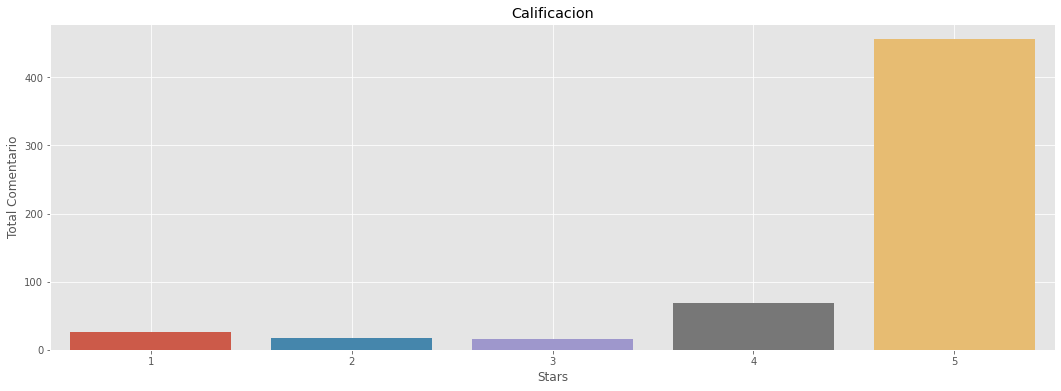

In [106]:
plt.figure(figsize=(18,6))
sns.barplot(x=data_copy['Calificacion'].value_counts().index,y=data_copy['Calificacion'].value_counts())
plt.xlabel('Stars')
plt.ylabel('Total Comentario')
plt.title('Calificacion')
plt.grid(True)

Hay mas comentarios de calificacion positivas que negativas, dentro del catalogo de productos escogidos para el analisis.

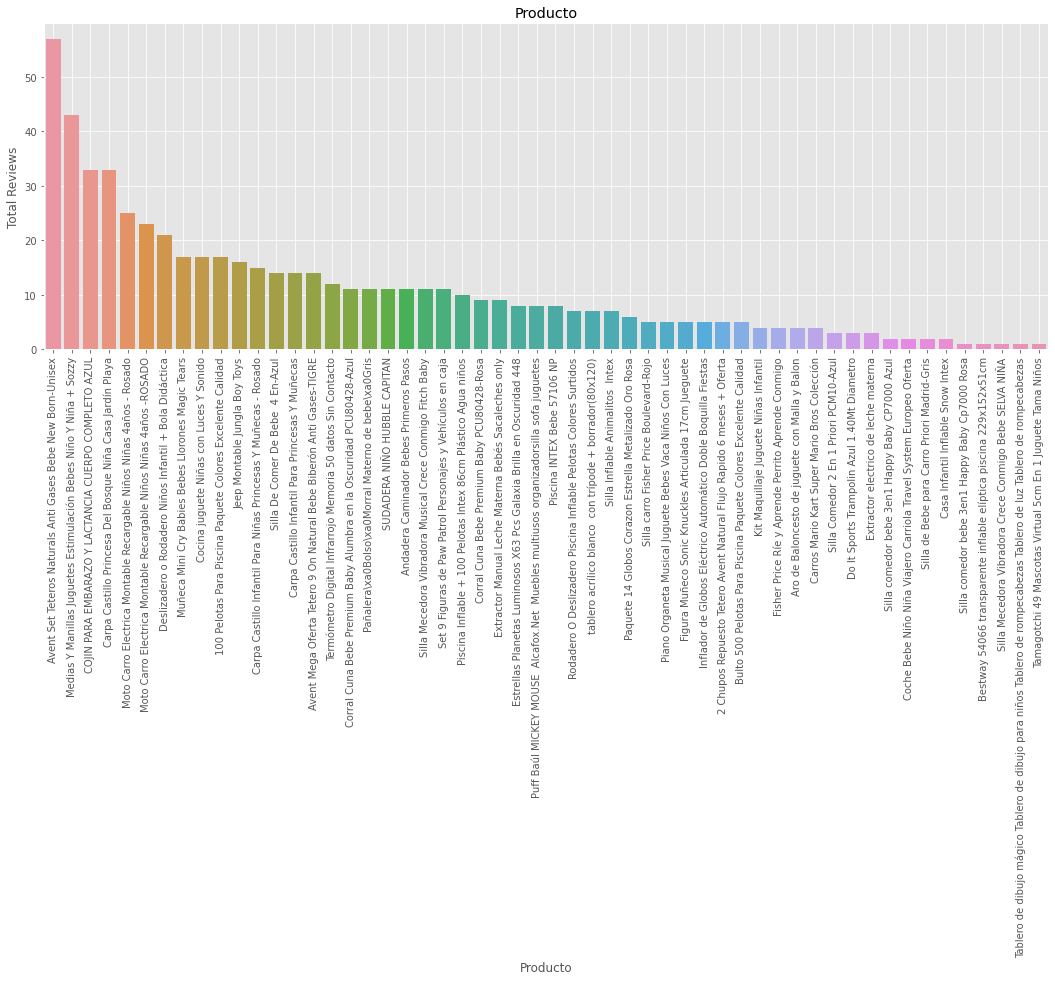

In [107]:
plt.figure(figsize=(18,6))
sns.barplot(x=data_copy['Nombre Producto'].value_counts().index,y=data_copy['Nombre Producto'].value_counts())
plt.xlabel('Producto')
plt.ylabel('Total Reviews')
plt.title('Producto')
plt.xticks(rotation=90)
plt.grid(True)

Hay productos que son mas populares dentro del grupo de catalogo de productos analizados. La mayoria de estos productos mas votados y comentados, son referentes a productos de necesidad para un bebe, o juegos didactivos para el mismo, menor a rango especifico de edad.

In [108]:
data_copy['mes'].value_counts()

07-July         133
08-August       110
06-June          93
05-May           88
12-December      37
09-September     32
11-November      26
04-April         23
10-October       18
03-March         10
01-January        9
02-February       5
Name: mes, dtype: int64

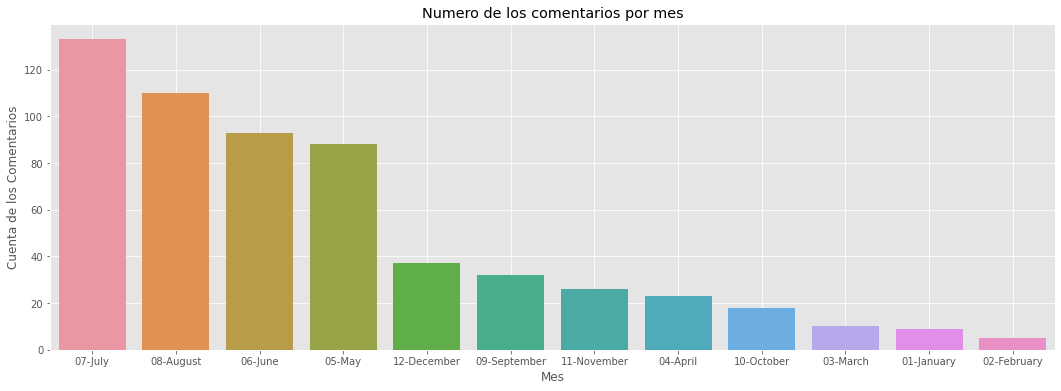

In [109]:
plt.figure(figsize=(18,6))
sns.barplot(x=data_copy['mes'].value_counts().index,y=data_copy['mes'].value_counts())
plt.xlabel('Mes')
plt.ylabel('Cuenta de los Comentarios')
plt.title('Numero de los comentarios por mes')
plt.grid(True)

Se evidencia que en los meses de verano (vacaciones), hay mas compras y por tanto mas reseñas y calificaciones de los productos.

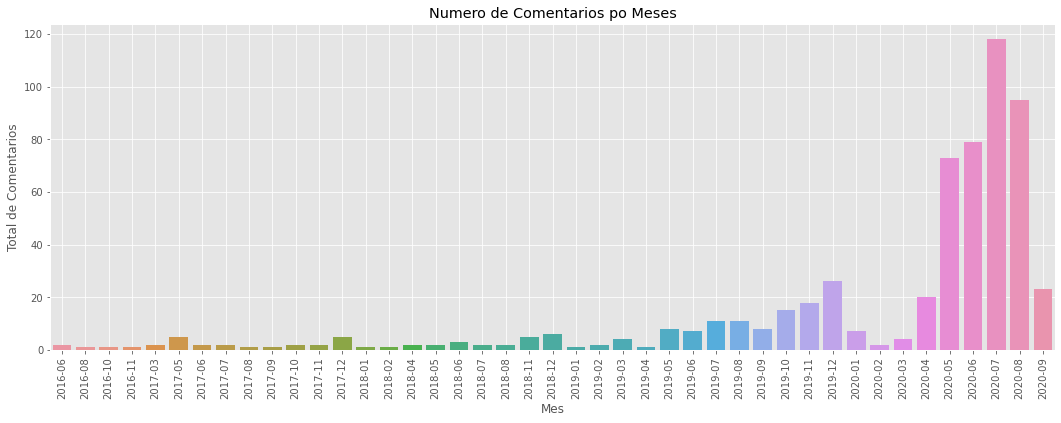

In [110]:
data_copy['año-mes'] = data_copy.apply(lambda row: str(row['Fecha'].year) + '-' + '0'*(2-len(str(row['Fecha'].month))) + str(row['Fecha'].month), axis=1) 
años_meses = data_copy['año-mes'].value_counts().sort_index()
plt.figure(figsize=(18,6))
sns.barplot(x=años_meses.index,y=años_meses)
plt.xlabel('Mes')
plt.ylabel('Total de Comentarios')
plt.title('Numero de Comentarios po Meses')
plt.xticks(rotation=90)
plt.grid(True)

Para el analisis realizado por cada año, en su respectivo mes, se evidencia un amuento considerable en el año, en los ultimos meses de Junio - Agosto. Posiblemente debido al resultado de la pandemia que hay en este ultimo año,ademas que en Julio se realizo varios eventos en compras en linea (Dia sin IVA) que aumento considerablemente la cantidad de comentarios. Tambien los datos a la fecha son extraidos el 13-09-2020, por ende, septiembre solo continen un porcentaje de comentarios.

## Procesamiento y Análisis Vectorial

In [111]:
TodosComentarios = data_copy['Comentario']
TodosComentarios.head(5)

0     super práctica y de buena calidad.
1                           Bue producto
2                              Excelente
3                      exelente servicio
4                     Excelente producto
Name: Comentario, dtype: object

Inicialmente contamos con todos los comentarios sin realizar un procesamiento de ese texto, para realizar un analisis inicial.Ese analisis inicial consta de visualizar la distribucion del texto a traves de las nubes de palabras

In [112]:
word_cloud_text = ''.join(data_copy['Comentario'])

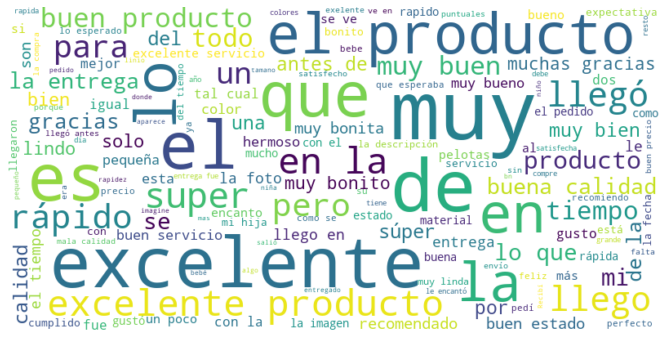

In [113]:
wordcloud = WordCloud(max_font_size=100, max_words=150, background_color="white",
                      width=800, height=400).generate(word_cloud_text)
plt.figure(figsize=(18,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

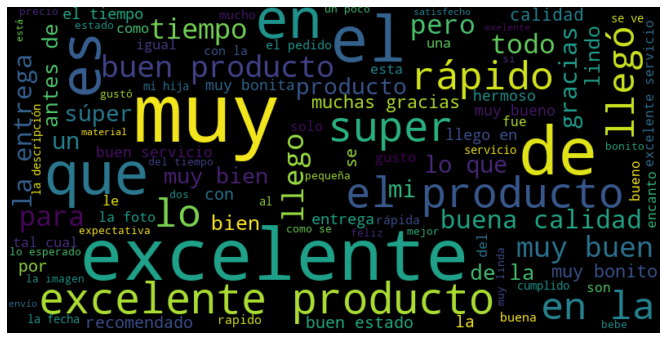

In [114]:
#COMENTARIOS POSITIVOS
positiveReviews = data_copy[data_copy['Calificacion'] >= 4] #filtrado por estrella
reviews_text = ' '.join(positiveReviews['Comentario']) 

# creación del objeto de nube de palabras
wordcloud2 = WordCloud(max_font_size=100, max_words=100, background_color="black",
                          width=800, height=400).generate(reviews_text)

plt.figure(figsize=(18,6))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

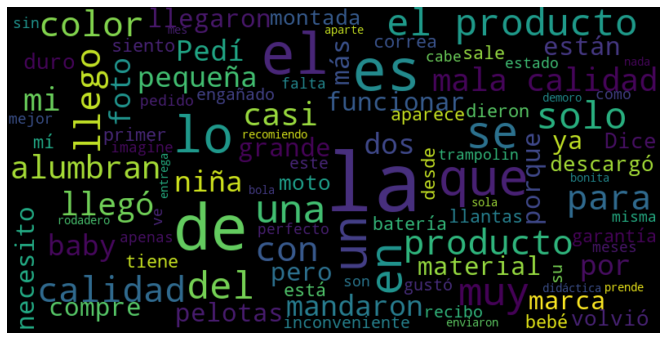

In [115]:
#COMENTARIOS NEGATIVOS
negativeReviews = data_copy[data_copy['Calificacion'] <= 2] #filtrado por estrella
reviews_text = ' '.join(negativeReviews['Comentario']) 

# creación del objeto de nube de palabras
wordcloud3 = WordCloud(max_font_size=100, max_words=100, background_color="black",
                          width=800, height=400).generate(reviews_text)

plt.figure(figsize=(18,6))
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis("off")
plt.show()

En cada conjunto de palabras la constante de las stop words es visibles, aun asi dentro de las reseñas positivas y las reseñas negativas hay atributos que evidencia como los comentarios son expresados como negativos y positivos. En las reseñas positivas "Excelente" y "Buena calidad" son buenos referentes al producto y en la reseñas negativa "Mala calidad" es un referente al producto pero de manera negativa. Aun asi dentro de las nubes de palabras tambien hay palabras que se pueden asociar no al producto, si no al proceso de entrega y como llego el producto a sus usuarios. A continuan se busca dar un contexto ese conjunto de palabras.

### Representacion basadas en conteo

El contexto de la oración o las palabras que lo rodean son muy necesarias para comprender el sentido de una oración. A continuacion se crea un una copia del conjunto de datos pre-procesado y con el se realiza en analisis del texto para la construcción del modelo.

In [116]:
data_text = data_copy.copy()

In [117]:
data_text['Text_Procesado'] = data_text['Comentario'].str.lower()

In [118]:
data_text.head(1)

,Nombre Producto,Precio,Autor,Comentario,Calificacion,Fecha,mes,año-mes,Text_Procesado
0,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Cele Aguas,super práctica y de buena calidad.,5,2020-09-02,09-September,2020-09,super práctica y de buena calidad.


In [119]:
#data_text['Text_Procesado'] = data_text['Text_Procesado'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

Los n-gramas se usa como tecnica de representaciones basadas en conteo. Esta técnica analiza texto al indicar con qué frecuencia ocurren ciertos tipos de estructuras.

In [120]:
stopwords = stopwords.words('spanish') 

positiveReviews1 = data_text[data_text['Calificacion'] >= 4] #filtrado por estrella
word_tokens_positive = nltk.word_tokenize(''.join(positiveReviews1['Comentario']))

word_tokens_clean_positive = [word for word in word_tokens_positive if word.lower() not in stopwords and len(word.lower()) > 2]

def top_k_ngrams_positive(word_tokens_clean,n,k):
    
    # Hallando los n-gramas
    n_gram_list = list(ngrams(word_tokens_clean, n))

    # Separando los n-gramas en cadenas independientes
    n_gram_strings = [' '.join(n_gram) for n_gram in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)

In [121]:
 top_k_ngrams_positive(word_tokens_clean_positive,4,50) 

[('servicio Excelente producto llego', 2), ('llego rápido buen servicio', 2), ('excelente producto muchas gracias', 2), ('producto mejor pago entrega', 2), ('gusta cómodo llego tiempo', 2), ('cómodo llego tiempo estimado', 2), ('super práctica buena calidad', 1), ('práctica buena calidad Bue', 1), ('buena calidad Bue producto', 1), ('calidad Bue producto Excelente', 1), ('Bue producto Excelente exelente', 1), ('producto Excelente exelente servicio', 1), ('Excelente exelente servicio Excelente', 1), ('exelente servicio Excelente producto', 1), ('servicio Excelente producto excelente', 1), ('Excelente producto excelente practico', 1), ('producto excelente practico excelente', 1), ('excelente practico excelente hermoso', 1), ('practico excelente hermoso tal', 1), ('excelente hermoso tal foto', 1), ('hermoso tal foto Excelente', 1), ('tal foto Excelente producto', 1), ('foto Excelente producto entrega', 1), ('Excelente producto entrega oportuna', 1), ('producto entrega oportuna eficaz', 1)

In [122]:
ReviewsNegative1 = data_text[data_text['Calificacion'] <= 2] #filtrado por estrella
word_tokens_negative = nltk.word_tokenize(''.join(ReviewsNegative1['Comentario']))

word_tokens_clean_negative = [word for word in word_tokens_negative if word.lower() not in stopwords and len(word.lower()) > 2]

def top_k_ngrams_negative(word_tokens_clean,n,k):
    
    # Hallando los n-gramas
    n_gram_list = list(ngrams(word_tokens_clean, n))

    # Separando los n-gramas en cadenas independientes
    n_gram_strings = [' '.join(n_gram) for n_gram in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)

In [123]:
 top_k_ngrams_negative(word_tokens_clean_negative,4,50) 

[('casi alumbran casi alumbran', 3), ('montada descargó volvió funcionar', 2), ('pequeña apenas cabe niña', 2), ('apenas cabe niña meses', 2), ('cabe niña meses imagine', 2), ('niña meses imagine grande', 2), ('alumbran casi alumbran casi', 2), ('Dice bola didáctica enviaron', 1), ('bola didáctica enviaron solo', 1), ('didáctica enviaron solo rodadero', 1), ('enviaron solo rodadero moto', 1), ('solo rodadero moto mala', 1), ('rodadero moto mala calidad', 1), ('moto mala calidad duro', 1), ('mala calidad duro sola', 1), ('calidad duro sola montada', 1), ('duro sola montada descargó', 1), ('sola montada descargó volvió', 1), ('descargó volvió funcionar garantía', 1), ('volvió funcionar garantía dieron', 1), ('funcionar garantía dieron aparte', 1), ('garantía dieron aparte demoro', 1), ('dieron aparte demoro entrega', 1), ('aparte demoro entrega solo', 1), ('demoro entrega solo dieron', 1), ('entrega solo dieron mes', 1), ('solo dieron mes garantía', 1), ('dieron mes garantía recomiendo',

Ahora vamos almacenar los datos en un DataFrame en el que cada 1-grama que aparece en uno o más comentarios está estructurado como una Serie realizando una representacion basada en conteo de los comentarios de Linio. 

In [124]:
#la cantidad de veces que aparece 1-grama en los diferentes comentarios de todo el texto
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_text['Text_Procesado'])
df_count_rep = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_count_rep.head()

,10,100,13,1a,24,86,abierto,abolladura,abre,abrirlo,...,vé,ya,yabque,yo,yoshi,ágil,ágiles,íntegra,único,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df_count_rep.shape

(584, 939)

Vemos que 939 1-gramas distintos de los 584 comentarios que se analizan, mucho de ellos con un significado numerico que no expresa un significado directo al idioma español. Asi mismo hay conjuntos de palabras que caracter unico que solo son mencionadas en casos particulares y no son utiles dentro del análisis.

Encontremos ahora las palabras de más alta y baja frecuencia, es decir, las que más y menos aparecen en los comentarios.

In [126]:
#Ahora se encuentran las palabras de mas alta y baja frecuencia
Texto = ' '.join(data_text['Text_Procesado'])
tokenized_words = nltk.word_tokenize(Texto)
word_tokens_clean = [word for word in tokenized_words if word.lower() not in stopwords and len(word.lower()) > 2]
word_freq = Counter(word_tokens_clean)
#1-gramas mas frecuentes
word_freq.most_common(10)

[('producto', 149),
 ('excelente', 127),
 ('buen', 76),
 ('tiempo', 55),
 ('calidad', 53),
 ('llego', 52),
 ('entrega', 45),
 ('llegó', 45),
 ('bien', 44),
 ('super', 42)]

In [127]:
#1-grama menos frecuentes
word_freq.most_common()[-10:]

[('estudio', 1),
 ('hundidas', 1),
 ('dar', 1),
 ('recorrido', 1),
 ('vivos', 1),
 ('dicen', 1),
 ('tarde', 1),
 ('imagino', 1),
 ('virus', 1),
 ('faltaron', 1)]

vamos a emparejar las palabras con su conteo en una sola estructura hallazgo de los n-gramas más comunes, de tal forma que pueda verse de forma ordenada:

In [128]:
from nltk.corpus import stopwords

In [129]:
stop_words = stopwords.words('spanish')

In [130]:
def get_top_n_words(comentario, n=1, k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = stopwords.words('spanish') ).fit(comentario)
    bag_of_words = vec.transform(comentario)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word1, sum_words[0, idx]) for word1, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    common_words = words_freq[:n]
    df = pd.DataFrame(common_words, columns = ['Comentario' , 'Cantidad'])
    return df.set_index('Comentario')

In [131]:
get_top_n_words(data_text['Text_Procesado'], 5, 3)

,Cantidad
Comentario,
excelente producto llego,5
excelente producto entrega,3
producto buena calidad,3
producto muchas gracias,3
llego tiempo estimado,3


Veamos otra forma de extraer las palabras que más se repiten, de manera que tengamos control sobre el tamaño  $k$  de los ngramas y la cantidad de palabras del Top  $n$ que queremos identificar:

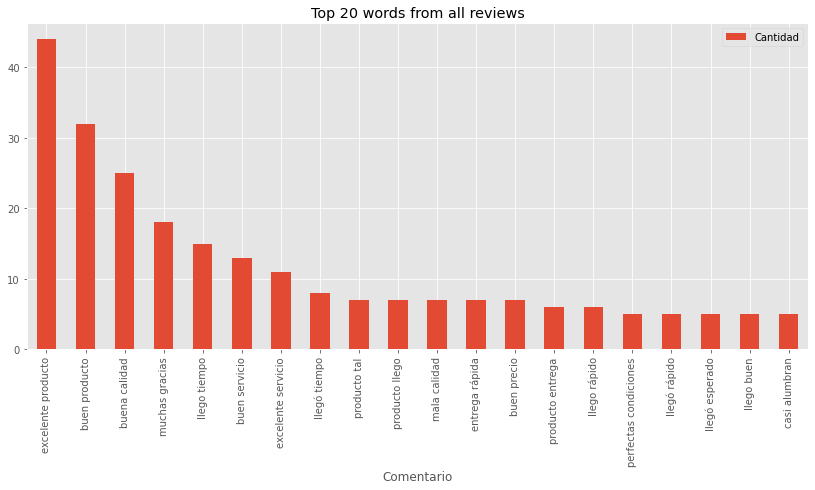

In [132]:
n = 20
k = 2
get_top_n_words(data_text['Text_Procesado'], n, k).plot(kind='bar', title='Top ' + str(n) + ' words from all reviews')
plt.grid(True)
plt.show()

En el grafico de barras se evidencia la frecuencia de los 2-gramas mas usados dentro de los comentarios. Se analiza ese tipo n-gramas para dar un pequeño contexto a la palabras mas usadas.

# Construyendo el Modelo

Ahora que se tiene el conjunto de datos procesado y preprocesado,ademas se realizado un análisis detallado del contexto de los comentarios y realizando una representacion vectorial que indica la frecuencia de la estrcutura que se usa, se procede a realizar una estandarizacion de los sentimientos de acuerdo a la calificacion que se da.

##### Estandarizando el Analisis de los Sentimientos 

Para el proposito del análisis de sentiminetos, realizamos un rating de valores binarios en base a la calificacion que se le da al producto siguiendo el siguiente esquema:
- Las calificaciones de 4 o 5 se mapean a 1, que hace referencia a los comentarios positivos.
- Las calificaciones de 1 o 2 se mapean a 0, que hace referencia a los comentarios negativos.
- Las calificacionse de 3 se remueven ya que representan comentarios neutrales.

In [133]:
data_text['Calificacion_Sentimientos'] = np.where(data_copy.Calificacion > 3,1,0)

## Remover los comentarios neutrales
data_text = data_text[data_copy.Calificacion != 3]

data_text['Calificacion_Sentimientos'].value_counts()

1    525
0     43
Name: Calificacion_Sentimientos, dtype: int64

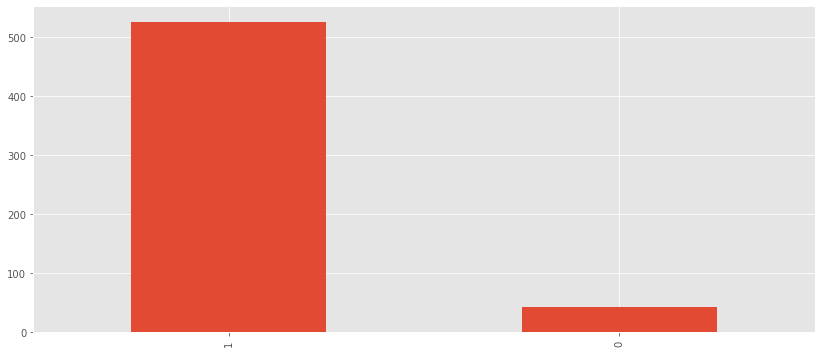

In [134]:
data_text.Calificacion_Sentimientos.value_counts().plot.bar()
plt.show()

In [135]:
data_text[['Text_Procesado','Calificacion','Calificacion_Sentimientos']].tail(15)

,Text_Procesado,Calificacion,Calificacion_Sentimientos
568,casi no alumbran,2,0
569,casi no alumbran,2,0
570,trae muy poca cinta doble faz para todo lo qu...,4,1
571,rápido envío y el producto es tal cual el des...,5,1
572,este producto me lo entregarón lo dejaron en ...,1,0
573,buen producto,5,1
574,llegó mucho antes de lo esperado y quedó muy ...,5,1
575,excelente y llegó a tiempo. gracias.,5,1
576,llego en el tiempo y buena calidad,5,1
577,buena calidad,5,1


Al realizar las matrices de co-ocurrencia palabra-documento, donde la entrada (𝑊,𝑋) de la matriz palabra-documento se establece en 1 si la palabra 𝑊 ocurre en el documento 𝑋 , y en 0 en caso contrario, como tecnica de repesentación vectorial, vamos a crear un **bag-of-words**, excluyendo las palabras de reuido que intentificaron en el análisis anterior.

In [136]:
bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,1))

bow_data = bow_counts.fit_transform(data_text.Text_Procesado)

In [137]:
bow_data

<568x933 sparse matrix of type '<class 'numpy.int64'>'
	with 4478 stored elements in Compressed Sparse Row format>

Se puede evidenciar 568 observaciones de fila de serie de `Texto_Procesado` y 835 de las columnas que se forman de acuerdo a los 1-gramas de los comentarios análizados.

In [138]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    data_text['Calificacion_Sentimientos'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [139]:
y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.95614
0    0.04386
Name: Calificacion_Sentimientos, dtype: float64

Como parte del análisis los datos de prueba contiene 95% de comentarios positivos, casi clasificando el total de comentarios como buenas criticas. Por lo tanto, esta es la linea de base que el modelo debe de superar.

## Aplicando Regresion Logistica sin balanceo de clases

In [140]:
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Se crea un metodo para mostrar una matriz de confusión dado unos datos de prueba y una predicción realizada. 

In [141]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

Creamos un modelo desbalanceado de regresión Logistica, que se entrena y se calcula su metrica F1_score a partir de unos datos de testeo y una clase de prediccion realizada.

In [142]:
### Training the model 
Modelo_desbalanceado = LogisticRegression() # Logistic regression
Modelo_desbalanceado.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_Modelo_desbalanceado = Modelo_desbalanceado.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, test_pred_Modelo_desbalanceado))

F1 score:  0.9818181818181818


Mostramos la matriz de confusion:

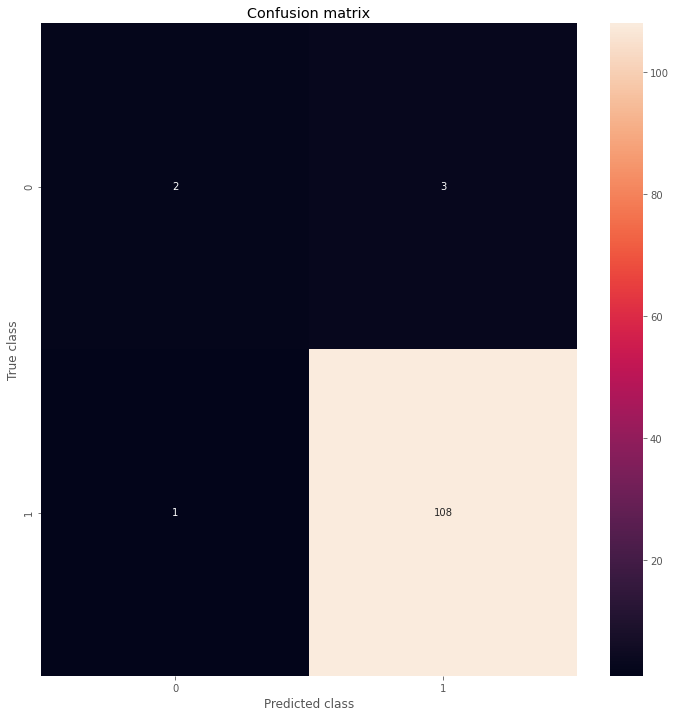

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.97      0.99      0.98       109

    accuracy                           0.96       114
   macro avg       0.82      0.70      0.74       114
weighted avg       0.96      0.96      0.96       114



In [143]:
mostrar_resultados(y_test_bow,test_pred_Modelo_desbalanceado)

108 datos de 109 son clasificados positivos esto evidencia que existe un desbalance entre clases, porque las predicción tiende a predecirse como comentarios positivos, ya que la cantidad existente del dataset original, incluye mas datos calificados como positivos que negativos.

Tenemos de soporte de 5 datos, como el recall fue del 40%, tres de los datos fueron calificados como falsos positivos. Esto se debe a que el modelo no detecta la clase y cuando lo hace es medianamente preciso. Todo esto debido al desbalanceo de clases.

In [144]:
test_pred_Modelo_desbalanceado

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

# Balanceando Clases

## Modelo Regresion Logistica Parametrizada

Se crea un modelo balanceado, modificando parametros o metricas del propio modelo para intentar equilibrar a la clase minoritaria. Estos ajustes se realizan en el parámetro **class_weight="balanced"**, donde se ajustan los pesos de los atributos.

In [145]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

Con el metodo para mostrar la matriz de confusión creado anteriormente, se muestra ya con los datos balanceados.

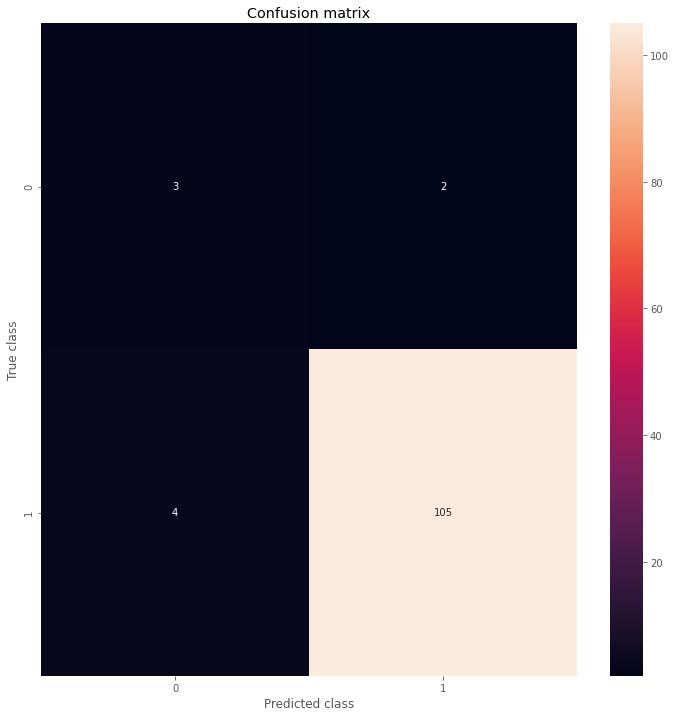

              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.98      0.96      0.97       109

    accuracy                           0.95       114
   macro avg       0.70      0.78      0.74       114
weighted avg       0.96      0.95      0.95       114



In [146]:
modelo_balanceado = run_model_balanced(X_train_bow, X_test_bow, y_train_bow, y_test_bow)
test_pred_modelo_balanceado = modelo_balanceado.predict(X_test_bow)
mostrar_resultados(y_test_bow,test_pred_modelo_balanceado)

In [147]:
print("F1 score: ", f1_score(y_test_bow,test_pred_modelo_balanceado))

F1 score:  0.9722222222222222


In [148]:
test_pred_modelo_balanceado

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

El modelo detecta bien la clase pero también incluye muestras de otras clases, es decir, tiene una baja precision pero tiene medianamente un buen recall, despúes de realizar el balanceo de clases. Como consecuencia la metrica de F1_score es mas baja, pero el modelo realiza predicciones mas precisas de las clases de etiqueta.

## Modelo Regresion Logistica : Estrategia de SMOTE

In [149]:
from imblearn.combine import SMOTETomek

In [150]:
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

Distribution before resampling Counter({1: 416, 0: 38})
Distribution after resampling Counter({1: 416, 0: 416})


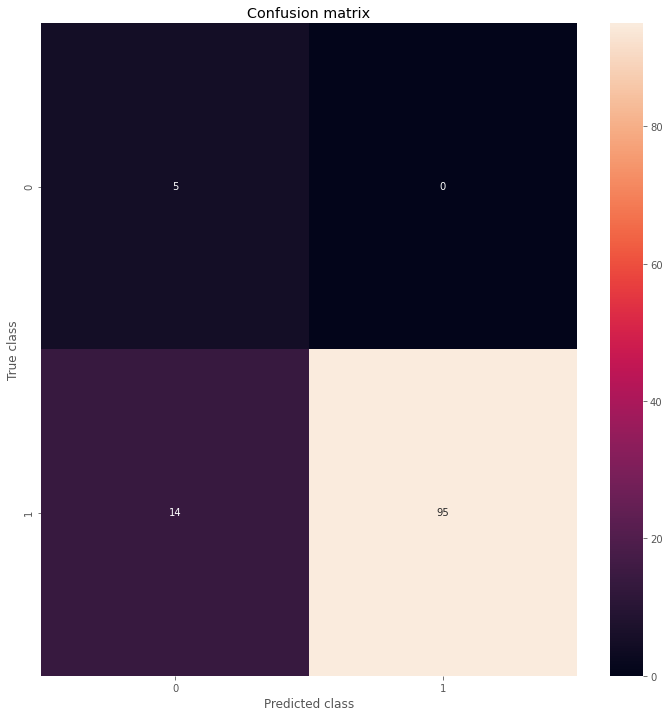

              precision    recall  f1-score   support

           0       0.26      1.00      0.42         5
           1       1.00      0.87      0.93       109

    accuracy                           0.88       114
   macro avg       0.63      0.94      0.67       114
weighted avg       0.97      0.88      0.91       114



In [151]:
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train_bow, y_train_bow)
 
print ("Distribution before resampling {}".format(Counter(y_train_bow)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test_bow, y_train_res, y_test_bow)
pred_y = model.predict(X_test_bow)
mostrar_resultados(y_test_bow, pred_y)

In [152]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [153]:
print("F1 score: ", f1_score(y_test_bow, pred_y))

F1 score:  0.9313725490196079


Con este modelo, se logró un aumento al 100%
del recall para la clase minoritaria (negativos), pero la precisión disminuyó causando el aumento de falsos positivos.

## Modelo del Árbol de Decisión

In [154]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import tree

Creamos un modelo de árbol de decisión con los datos balanceados a partir de clasificador de ensamble que utiliza Bagging. Y se utiliza nuevamente el método para mostrar la matriz de confusión.

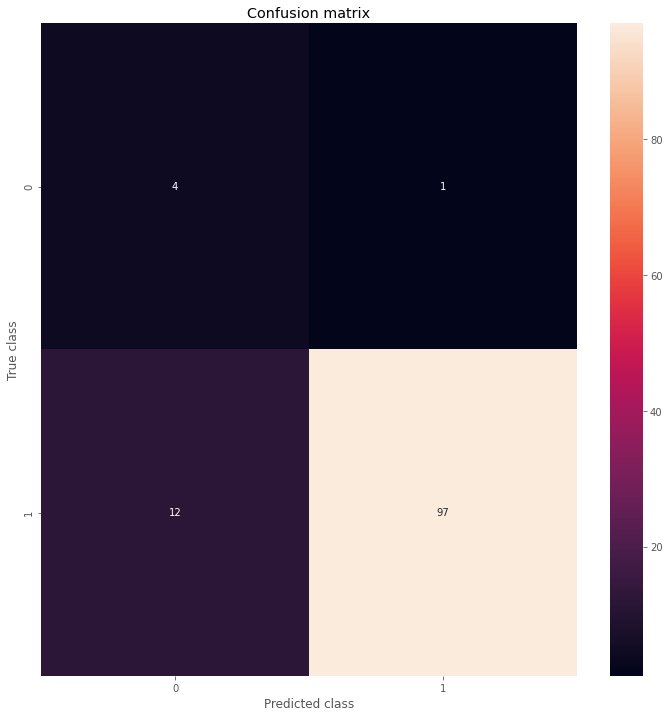

              precision    recall  f1-score   support

           0       0.25      0.80      0.38         5
           1       0.99      0.89      0.94       109

    accuracy                           0.89       114
   macro avg       0.62      0.84      0.66       114
weighted avg       0.96      0.89      0.91       114



In [155]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
bbc.fit(X_train_bow, y_train_bow)
pred_y_bow = bbc.predict(X_test_bow)
mostrar_resultados(y_test_bow, pred_y_bow)


In [156]:
print("F1 score: ", f1_score(y_test_bow, pred_y_bow))

F1 score:  0.9371980676328503


Con este modelo, se logró un aumento significativo del recall para la clase minoritaria (negativos), pero la precisión disminuyó causando el aumento de falsos positivos.

## Comparación de Modelos

In [157]:
df = pd.DataFrame({"Modelo":["Regresion Logistica","R.Logistica Parametrizada","R.Logistica SMOTE Tomek","Arboles de Decisión"],"F1_Score":[0.98,0.97,0.94,0.93],"Recall (Clase Minoritaria)":[0.40,0.60, 1.00, 0.80],"Precision (Clase Minoritaria)":[0.67,0.43,0.29,0.25]})
df

,Modelo,F1_Score,Recall (Clase Minoritaria),Precision (Clase Minoritaria)
0,Regresion Logistica,0.98,0.4,0.67
1,R.Logistica Parametrizada,0.97,0.6,0.43
2,R.Logistica SMOTE Tomek,0.94,1.0,0.29
3,Arboles de Decisión,0.93,0.8,0.25


Entre mas ajuste se realicen al recall, la metrica tiende a disminuir, porque el modelo empieza a predecir de forma mas acertada un comentario. Se pueden situaciones:

- Alta precision y alto recall: el modelo maneja perfectamente esa clase
- Alta precision y bajo recall: el modelo no detecta la clase muy bien, pero cuando lo hace es altamente confiable.
- Baja precisión y alto recall: el modelo detecta bien la clase pero también incluye muestras de otras clases.
- Baja precisión y bajo recall: el modelo no logra clasificar la clase correctamente.

La Regresión Logistica parametrizada fue la mas equilabra en recall y precisión y mantiene una metrica alta por lo que para el análisis es la mas apropiada al trabajar con clases desbalanceadas. Esto muestra que este modelo esta dentro de la tercera clasificación dentro de la matriz confusión, logra detectar bien si el comentario es positivo o negativo, pero puede incluir falsos positivos dentro de esta predicción.

## Análisis de Sentimientos a través de los Comentarios

A continuacón se realiza un análisis estadisticos de los comentarios analizados.

A cada 1-grama se le asigna un peso y estos se almacenan en un dataframe llamado "lr_weights". Estos pesos son extraidos del modelo de regresión logistica. Los pesos representan que tan frecuente es el uso de esa palabra en un contexto positivo o negativo.Entre mas se aleja de cero positivamente, es mas frecuente en contextos positivos y entre mas se aleja de cero negativamente, la palabra es mas frecuente en contextos negativos.

In [158]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   modelo_balanceado.coef_[0])), # get the logistic regression coefficients
                          columns= ['Palabra','Peso']) # defining the colunm names

lr_weights.sort_values(['Peso'], ascending = False)[:15] # top-15 more important features for positive reviews

,Palabra,Peso
381,excelente,1.277221
113,buen,1.094039
734,que,1.045067
871,tiempo,0.960023
679,pero,0.837854
110,bonito,0.781756
104,bien,0.750518
117,bueno,0.665271
325,entrega,0.604101
114,buena,0.563451


In [159]:
lr_weights.sort_values(['Peso'], ascending = True)[0:15] # top-15 more important features for negative reviews

,Palabra,Peso
608,normalita,-2.347833
607,no,-2.101786
672,pequeñas,-1.968932
917,vienen,-1.445714
139,casi,-1.396327
50,alumbran,-1.396327
828,solo,-1.232138
243,del,-1.072587
289,dos,-0.961615
659,pedí,-0.932535


El top 10 de las palabras que mas influyeron en el modelo para saber si un comentario es negativo o es positivo se muestra en el mismo DataFrame, donde "Excelente" es 1-grama mas influyente para saber si un comentario es positivo, y "no" es el 1-grama que influye en los comentarios negativos, contando que siempre es el negativo que acompaña a un contexto.

In [160]:
data_text.to_json(r'Productos_Mapeados.json',force_ascii = False)
data_text

,Nombre Producto,Precio,Autor,Comentario,Calificacion,Fecha,mes,año-mes,Text_Procesado,Calificacion_Sentimientos
0,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Cele Aguas,super práctica y de buena calidad.,5,2020-09-02,09-September,2020-09,super práctica y de buena calidad.,1
1,Silla comedor bebe 3en1 Happy Baby CP7000 Azul,$109.900,Fredy Javier Gonzalez Parra,Bue producto,5,2020-08-27,08-August,2020-08,bue producto,1
2,Silla comedor bebe 3en1 Happy Baby Cp7000 Rosa,$109.900,Sandra Arango,Excelente,5,2020-09-09,09-September,2020-09,excelente,1
3,Inflador de Globos Eléctrico Automático Doble ...,$68.500,Carlos andres Bedoya osorio Carlos andres Bed...,exelente servicio,5,2020-09-10,09-September,2020-09,exelente servicio,1
4,Inflador de Globos Eléctrico Automático Doble ...,$68.500,Danilo Guerrero,Excelente producto,5,2020-09-03,09-September,2020-09,excelente producto,1
...,...,...,...,...,...,...,...,...,...,...
578,tablero acrílico blanco con trípode + borrado...,$115.000,mariana peña,me gusto,5,2020-01-26,01-January,2020-01,me gusto,1
579,Bulto 500 Pelotas Para Piscina Paquete Colores...,$92.000,Karen Banderas,No todas las pelotas no son de la misma calid...,2,2020-06-30,06-June,2020-06,no todas las pelotas no son de la misma calid...,0
580,Bulto 500 Pelotas Para Piscina Paquete Colores...,$92.000,Charles Alberto Castrillo Jimenez,muy buen producto puntuales en la entrega y m...,5,2020-06-25,06-June,2020-06,muy buen producto puntuales en la entrega y m...,1
581,Bulto 500 Pelotas Para Piscina Paquete Colores...,$92.000,Karina Mogollon Karina Mogollon,Buena calidad,5,2020-05-23,05-May,2020-05,buena calidad,1


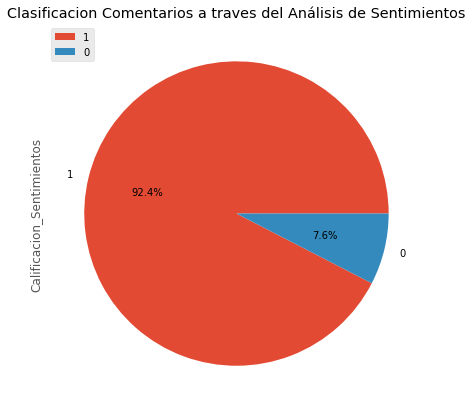

In [161]:
pd.DataFrame(data_text['Calificacion_Sentimientos'].value_counts()).plot(kind='pie', y='Calificacion_Sentimientos', figsize=(7, 7), autopct='%1.1f%%')
plt.title('Clasificacion Comentarios a traves del Análisis de Sentimientos')
plt.legend(loc='upper left')
plt.show()

Se puede concluir que la mayoria de comentarios analizados dentro del contexto del análisis de sentimientos son un 92.4% calificados como positivos y un 7.6% calificados como negativos.

In [162]:
positiveReviews = data_text[data_text['Calificacion_Sentimientos'] == 1]
len(positiveReviews['Nombre Producto'].unique())

53

Extraemos del conjunto de datos los comentarios que son calificados como positivos y analizamos los productos que conforman esta lista y los comentarios que contiene cada uno.

In [163]:
positiveReviews['Nombre Producto'].value_counts()

Avent Set Teteros Naturals Anti Gases Bebe New Born-Unisex                                                              55
Medias Y Manillas Juguetes Estimulación Bebes Niño Y Niña + Sozzy                                                       39
Carpa Castillo Princesa Del Bosque Niña Casa Jardín Playa                                                               33
COJIN PARA EMBARAZO Y LACTANCIA CUERPO COMPLETO AZUL                                                                    29
Moto Carro Electrica Montable Recargable Niños Niñas 4años -ROSADO                                                      21
Moto Carro Electrica Montable Recargable Niños Niñas 4años - Rosado                                                     20
Deslizadero o Rodadero Niños Infantil + Bola Didáctica                                                                  20
Muñeca Mini Cry Babies Bebes Llorones Magic Tears                                                                       17
Cocina juguete N

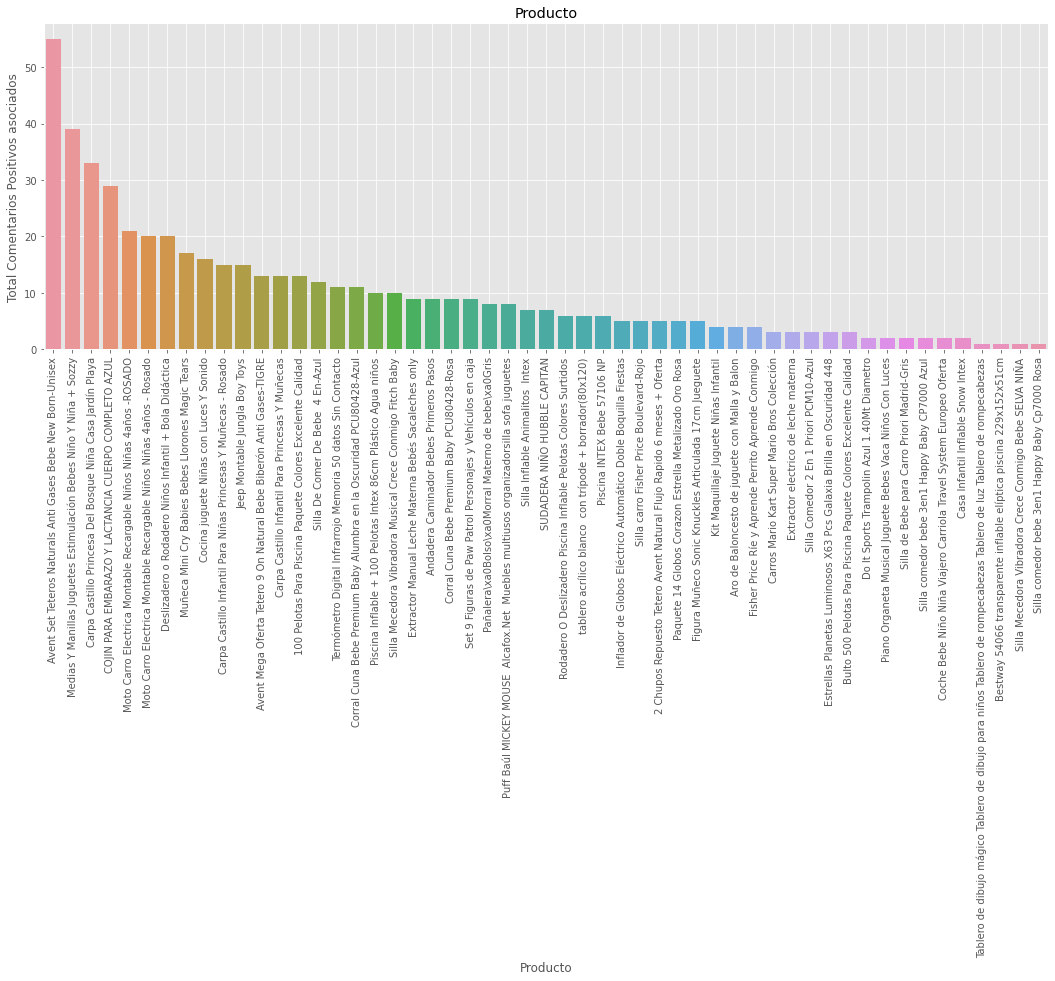

In [164]:
plt.figure(figsize=(18,6))
sns.barplot(x=positiveReviews['Nombre Producto'].value_counts().index,y=positiveReviews['Nombre Producto'].value_counts())
plt.xlabel('Producto')
plt.ylabel('Total Comentarios Positivos asociados')
plt.title('Producto')
plt.xticks(rotation=90)
plt.grid(True)

Se puede analizar de la grafica la cantidad de productos que más atraen (asociados con sentimientos positivos), en este caso seria el "Avent Set Teteros Naturals Anti Gases Bebe New Born-Unisex"  que contiene mas comentarios positivos registrados.

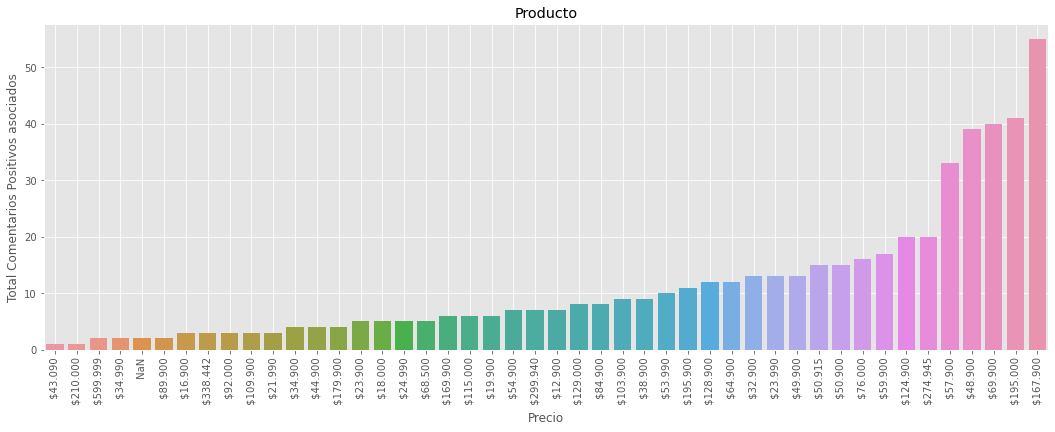

In [166]:
plt.figure(figsize=(18,6))
sns.barplot(x=positiveReviews['Precio'].value_counts().sort_values().index,y=positiveReviews['Precio'].value_counts().sort_values())
plt.xlabel('Precio')
plt.ylabel('Total Comentarios Positivos asociados')
plt.title('Producto')
plt.xticks(rotation=90)
plt.grid(True)

De la grafica se muestra la correlación existente entre el precio de los productos y su aceptación a través del análisis
de sentimientos positivos, en donde el más atractivo no es el producto mas caro, ni el más barato.

In [167]:
NegativeReviews = data_text[data_text['Calificacion_Sentimientos'] == 0]
len(NegativeReviews['Nombre Producto'].unique())

25

Extraemos del conjunto de datos los comentarios que son calificados como negativos y analizamos los productos que conforman esta lista y los comentarios que contiene cada uno.

In [168]:
NegativeReviews['Nombre Producto'].value_counts()

Estrellas Planetas Luminosos X63 Pcs Galaxia Brilla en Oscuridad 448    5
Moto Carro Electrica Montable Recargable Niños Niñas 4años - Rosado     4
COJIN PARA EMBARAZO Y LACTANCIA CUERPO COMPLETO AZUL                    3
Pañalera\xa0Bolso\xa0Morral Materno de bebe\xa0Gris                     3
SUDADERA NIÑO HUBBLE CAPITAN                                            3
100 Pelotas Para Piscina Paquete Colores Excelente Calidad              3
Moto Carro Electrica Montable Recargable Niños Niñas 4años -ROSADO      2
Andadera Caminador Bebes Primeros Pasos                                 2
Piscina INTEX Bebe 57106 NP                                             2
Do It Sports Trampolin Azul 1.40Mt Diametro                             1
Avent Mega Oferta Tetero 9 On Natural Bebe Biberón Anti Gases-TIGRE     1
Paquete 14 Globos Corazon Estrella Metalizado Oro Rosa                  1
Medias Y Manillas Juguetes Estimulación Bebes Niño Y Niña + Sozzy       1
Deslizadero o Rodadero Niños Infantil 

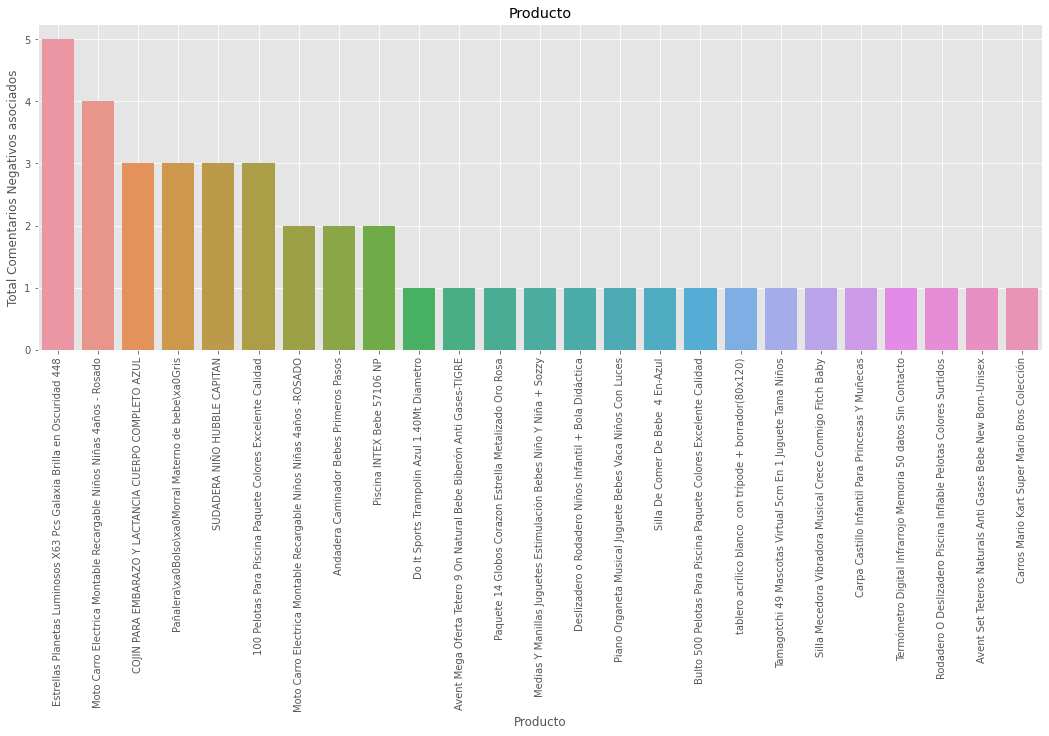

In [169]:
plt.figure(figsize=(18,6))
sns.barplot(x=NegativeReviews['Nombre Producto'].value_counts().index,y=NegativeReviews['Nombre Producto'].value_counts())
plt.xlabel('Producto')
plt.ylabel('Total Comentarios Negativos asociados')
plt.title('Producto')
plt.xticks(rotation=90)
plt.grid(True)

Se puede analizar de la grafica la cantidad de productos que menos atraen (asociados con sentimientos negativos), en este caso seria el "Estrellas planetas luuminosos X63 Pcs Galaxia Brilla en Oscuridad 488" que contiene mas comentarios negativos registrados.

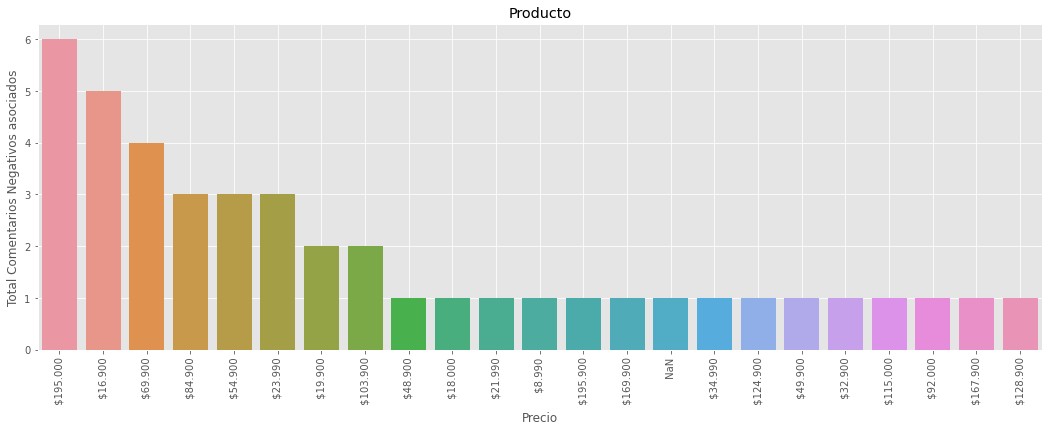

In [170]:
plt.figure(figsize=(18,6))
sns.barplot(x=NegativeReviews['Precio'].value_counts().index,y=NegativeReviews['Precio'].value_counts())
plt.xlabel('Precio')
plt.ylabel('Total Comentarios Negativos asociados')
plt.title('Producto')
plt.xticks(rotation=90)
plt.grid(True)

De la grafica se muestra la correlación existente entre el precio de los productos y su aceptación a través del análisis de sentimientos negativos, en donde el producto más rechazado es de los mas caros.